# Practical 11

# Develop an application to predict user will purchase the company's newly launched product or not using logistic regression classifier.

In [3]:
# Importing the libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data= pd.read_csv("D:/Machine Learning/User_Data.csv")  #Importing the dataset.
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [5]:
# Problem Statement
# To make the Logistic Regression model predicting wether a user will purchase the product or not

In [6]:
# Input
x = data.iloc[:,[2,3]].values
#Output
y = data.iloc[:,4].values

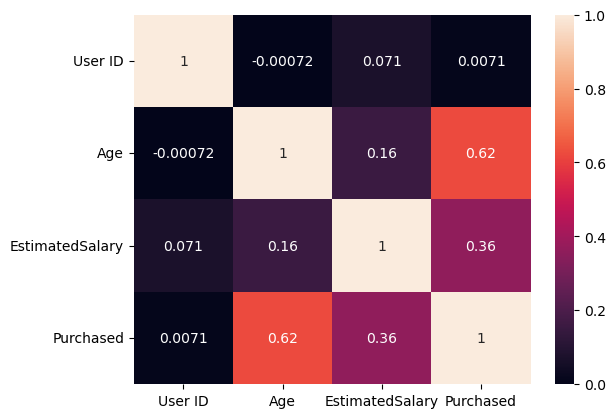

In [7]:
sns.heatmap(data.corr(),annot = True) #pearson correlation
plt.show()

In [8]:
# Splitting the data to train and test
#75% train data
#25% test data

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25 , random_state = 2 )

In [10]:
from sklearn.preprocessing import StandardScaler  # scaling
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)
print(xtrain)

[[ 0.03172569  0.06201266]
 [-0.06539376 -0.50084108]
 [-0.64811043 -1.50805304]
 [ 0.03172569  0.32862759]
 [ 0.32308402  0.09163654]
 [-0.45387154 -1.12294258]
 [-0.74522987 -1.53767692]
 [-0.25963265 -0.64896049]
 [-1.13370765  0.50637087]
 [-0.06539376  2.22455597]
 [ 0.03172569  0.06201266]
 [-1.13370765 -1.5673008 ]
 [ 1.10003958  0.56561863]
 [-0.25963265 -1.24143811]
 [ 1.39139791 -0.91557542]
 [-1.42506599 -1.21181423]
 [-0.93946876 -0.9451993 ]
 [ 1.97411458 -0.64896049]
 [ 0.90580069 -0.56008884]
 [-1.13370765  0.32862759]
 [ 0.03172569 -0.23422615]
 [ 0.80868124 -1.38955751]
 [-0.25963265 -0.35272168]
 [ 0.90580069  1.30621566]
 [ 0.32308402 -0.17497839]
 [-0.25963265 -0.56008884]
 [-0.25963265 -1.38955751]
 [ 1.48851736 -1.03407094]
 [-0.06539376  0.1508843 ]
 [-0.84234932 -0.64896049]
 [-0.06539376  0.03238878]
 [-0.25963265  0.12126042]
 [ 0.22596457 -0.29347391]
 [-0.25963265  0.29900371]
 [ 0.12884513  0.06201266]
 [ 1.97411458  2.22455597]
 [-1.03658821 -1.44880527]
 

In [11]:
from sklearn.linear_model import LogisticRegression # Applying regression to training data.
classifier = LogisticRegression(random_state = 2)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=2)

In [12]:
y_pred = classifier.predict(xtest)

In [13]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
print("Confusion Matrix : \n" , cm)

Confusion Matrix : 
 [[56  6]
 [13 25]]


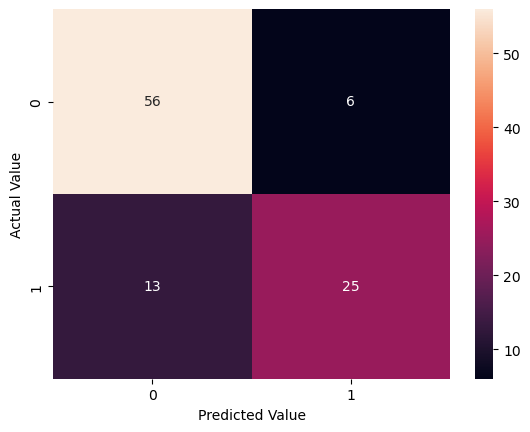

In [14]:
sns.heatmap(cm, annot = True)  # Creating heatmap between actual welding and predicted value Also known as confusion matrix
plt.ylabel('Actual Value')
plt.xlabel('Predicted Value')
plt.show()

In [15]:
import sklearn.metrics as metrics  # Finding accuracy precision and recall.
print ('Accuracy: ', metrics.accuracy_score(ytest,y_pred))
print ('Precision: ', metrics.precision_score(ytest,y_pred))
print ('Recall: ', metrics.recall_score(ytest,y_pred))

Accuracy:  0.81
Precision:  0.8064516129032258
Recall:  0.6578947368421053


In [16]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85        62
           1       0.81      0.66      0.72        38

    accuracy                           0.81       100
   macro avg       0.81      0.78      0.79       100
weighted avg       0.81      0.81      0.81       100



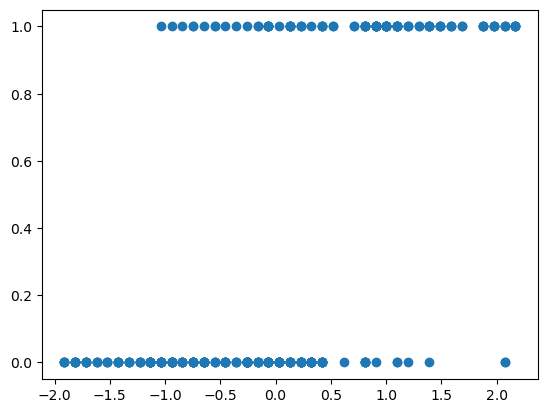

In [17]:
plt.scatter(xtrain[:, 0], ytrain)
#Age

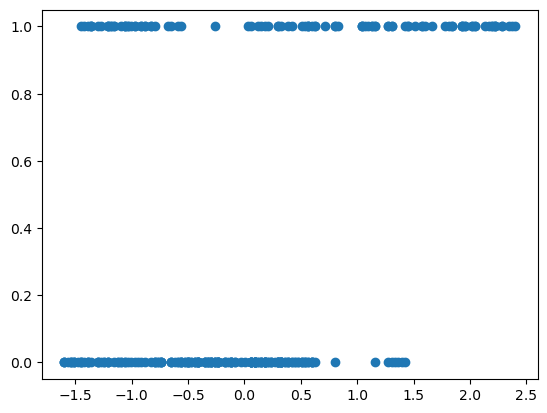

In [18]:
plt.scatter(xtrain[:, 1], ytrain)  
# Salary